In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from util import plot_util
import pathlib

In [2]:
cwd = pathlib.Path.cwd()
input_dir = cwd / 'data'

In [17]:
data = pd.read_csv(input_dir / 'units_byCBSA.csv', index_col=[0, 1])
data.head()

1 unit  2 units  3-4 units  5+ units  Population
CBSA Code Year                                                        
440       1992-01-01     1.0      0.0        0.0       0.0         NaN
          1992-01-01     6.0      0.0        0.0       0.0         NaN
          1992-01-01    35.0      0.0        0.0       0.0         NaN
          1992-01-01     1.0      0.0        0.0       0.0         NaN
          1992-01-01     3.0      0.0        4.0       0.0         NaN

CBSA Info

In [4]:
geo_dir = cwd / 'geo'
cbsa_codes = pd.read_csv(geo_dir / 'CBSA_Codes.csv')
cbsa_codes

,CBSA Code,CBSA Title,State Name
0,10100,"Aberdeen, SD",South Dakota
1,10100,"Aberdeen, SD",South Dakota
2,10140,"Aberdeen, WA",Washington
3,10180,"Abilene, TX",Texas
4,10180,"Abilene, TX",Texas
...,...,...,...
1911,49700,"Yuba City, CA",California
1912,49700,"Yuba City, CA",California
1913,49740,"Yuma, AZ",Arizona
1914,49780,"Zanesville, OH",Ohio


In [5]:
cbsa_codes1 = cbsa_codes.drop_duplicates(subset='CBSA Code').set_index('CBSA Code')
cbsa_codes1

,CBSA Title,State Name
CBSA Code,,
10100,"Aberdeen, SD",South Dakota
10140,"Aberdeen, WA",Washington
10180,"Abilene, TX",Texas
10220,"Ada, OK",Oklahoma
10300,"Adrian, MI",Michigan
...,...,...
49660,"Youngstown-Warren-Boardman, OH-PA",Ohio
49700,"Yuba City, CA",California
49740,"Yuma, AZ",Arizona


In [6]:
ca_codes = cbsa_codes1[cbsa_codes1['State Name'] == 'California']
ca_codes

,CBSA Title,State Name
CBSA Code,,
12540,"Bakersfield, CA",California
17020,"Chico, CA",California
17340,"Clearlake, CA",California
18860,"Crescent City, CA",California
20940,"El Centro, CA",California
21700,"Eureka-Arcata, CA",California
23420,"Fresno, CA",California
25260,"Hanford-Corcoran, CA",California
31080,"Los Angeles-Long Beach-Anaheim, CA",California


In [7]:
cbsa_dict = cbsa_codes1['CBSA Title'].to_dict()
cbsa_state_dict = cbsa_codes1['State Name'].to_dict()

Pivot Tables

In [18]:
data['Single Family'] = data['1 unit']
data['Multifamily'] = data['2 units'] + data['3-4 units'] + data['5+ units']
data.head()

1 unit  2 units  3-4 units  5+ units  Population  \
CBSA Code Year                                                           
440       1992-01-01     1.0      0.0        0.0       0.0         NaN   
          1992-01-01     6.0      0.0        0.0       0.0         NaN   
          1992-01-01    35.0      0.0        0.0       0.0         NaN   
          1992-01-01     1.0      0.0        0.0       0.0         NaN   
          1992-01-01     3.0      0.0        4.0       0.0         NaN   

                      Single Family  Multifamily  
CBSA Code Year                                    
440       1992-01-01            1.0          0.0  
          1992-01-01            6.0          0.0  
          1992-01-01           35.0          0.0  
          1992-01-01            1.0          0.0  
          1992-01-01            3.0          4.0

In [19]:
df = data.reset_index().pivot_table(index=['CBSA Code', 'Year'], values=['Single Family', 'Multifamily'], aggfunc=np.sum, fill_value=0.)
df.head()

Multifamily  Single Family
CBSA Code Year                                  
440       1992-01-01           75            229
          1993-01-01           40            290
          1994-01-01           43            345
          1995-01-01          125            339
          1996-01-01           35            352

In [20]:
df.to_csv(input_dir / 'totals_by_CBSA.csv')

In [21]:
fractions = df.apply(lambda x: x / df.sum(axis=1))
fractions.head()

Multifamily  Single Family
CBSA Code Year                                  
440       1992-01-01     0.246711       0.753289
          1993-01-01     0.121212       0.878788
          1994-01-01     0.110825       0.889175
          1995-01-01     0.269397       0.730603
          1996-01-01     0.090439       0.909561

In [22]:
charts_dir = input_dir / 'charts_CA_metros'
charts_dir.mkdir(exist_ok=True)

In [23]:
ca_sub = ca_codes.index.to_list()
ca_names = [cbsa_dict[ix] for ix in ca_sub]
ca_names

['Bakersfield, CA',
 'Chico, CA',
 'Clearlake, CA',
 'Crescent City, CA',
 'El Centro, CA',
 'Eureka-Arcata, CA',
 'Fresno, CA',
 'Hanford-Corcoran, CA',
 'Los Angeles-Long Beach-Anaheim, CA',
 'Madera, CA',
 'Merced, CA',
 'Modesto, CA',
 'Napa, CA',
 'Oxnard-Thousand Oaks-Ventura, CA',
 'Red Bluff, CA',
 'Redding, CA',
 'Riverside-San Bernardino-Ontario, CA',
 'Sacramento-Roseville-Folsom, CA',
 'Salinas, CA',
 'San Diego-Chula Vista-Carlsbad, CA',
 'San Francisco-Oakland-Berkeley, CA',
 'San Jose-Sunnyvale-Santa Clara, CA',
 'San Luis Obispo-Paso Robles, CA',
 'Santa Cruz-Watsonville, CA',
 'Santa Maria-Santa Barbara, CA',
 'Santa Rosa-Petaluma, CA',
 'Sonora, CA',
 'Stockton, CA',
 'Susanville, CA',
 'Truckee-Grass Valley, CA',
 'Ukiah, CA',
 'Vallejo, CA',
 'Visalia, CA',
 'Yuba City, CA']

In [24]:
def convert_to_yyyy(year):
    return np.int(year[:4])
df1 = df.rename(mapper=convert_to_yyyy, axis=0, level=1)
df1 /= 1000
df1.head()

Multifamily  Single Family
CBSA Code Year                            
440       1992        0.075          0.229
          1993        0.040          0.290
          1994        0.043          0.345
          1995        0.125          0.339
          1996        0.035          0.352

/Users/subin/.local/share/virtualenvs/building-permits-survey-zHZdvx4y/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/subin/.local/share/virtualenvs/building-permits-survey-zHZdvx4y/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/subin/.local/share/virtualenvs/building-permits-survey-zHZdvx4y/lib/python3.7/site-

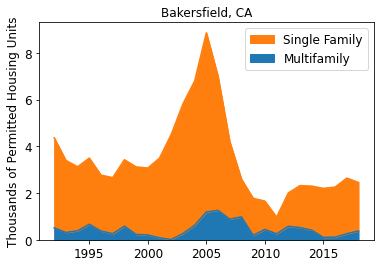

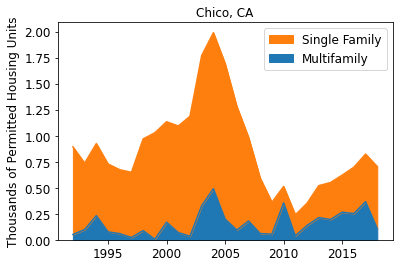

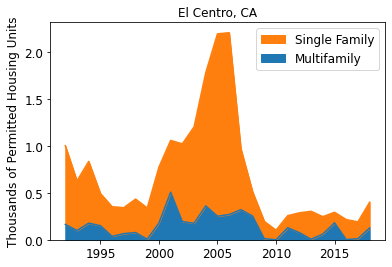

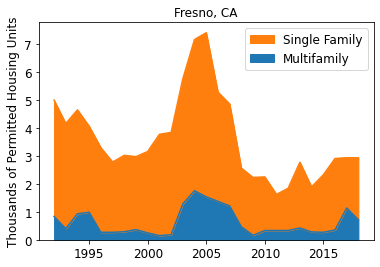

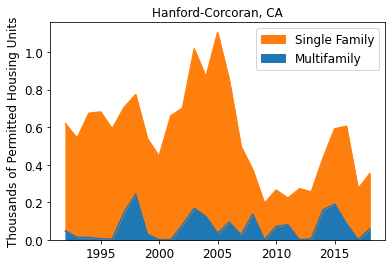

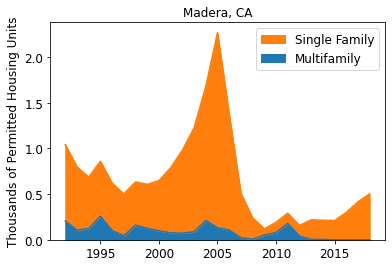

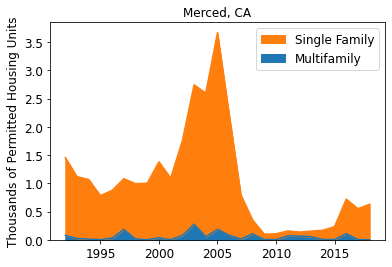

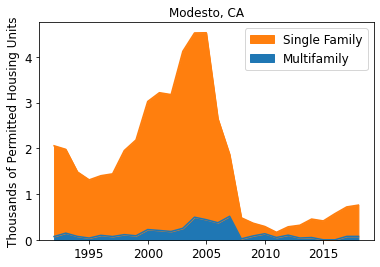

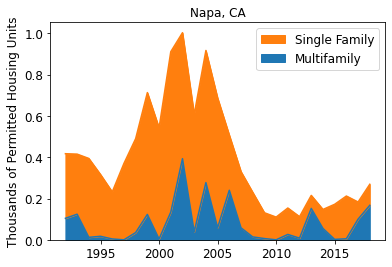

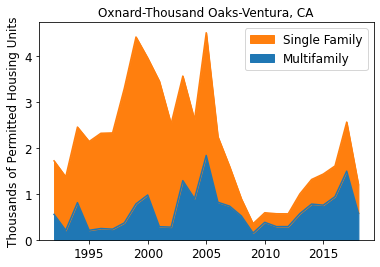

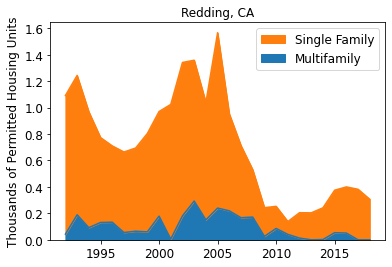

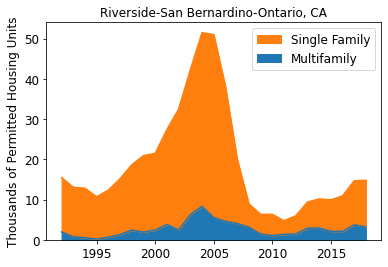

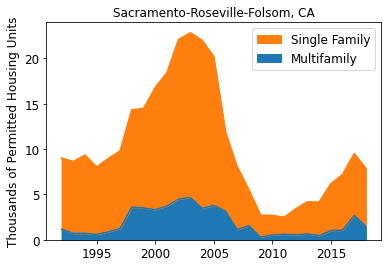

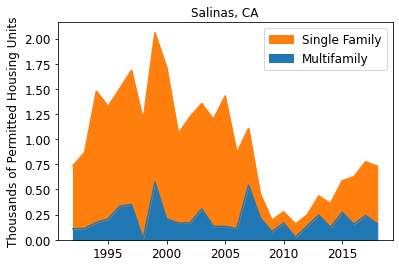

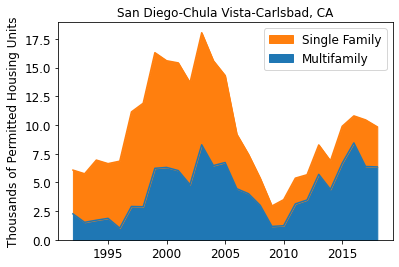

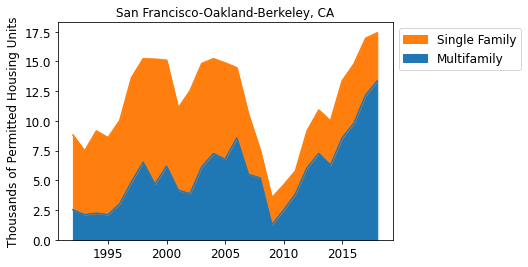

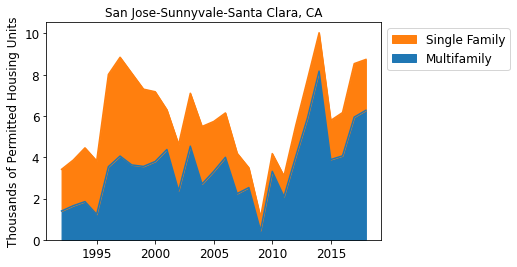

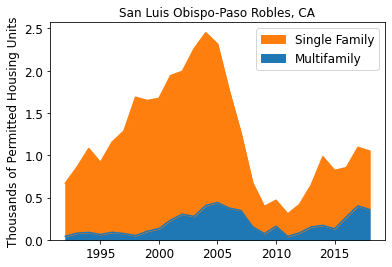

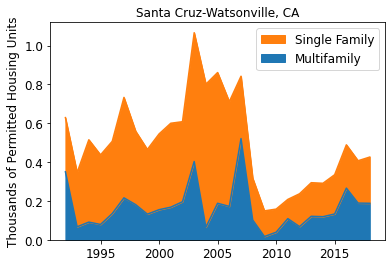

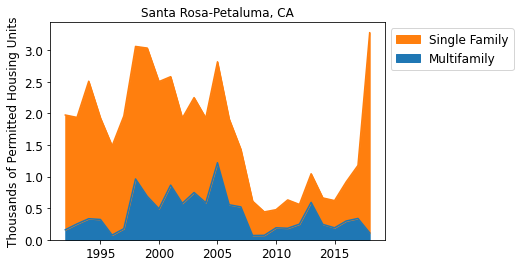

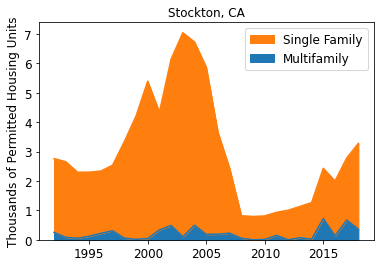

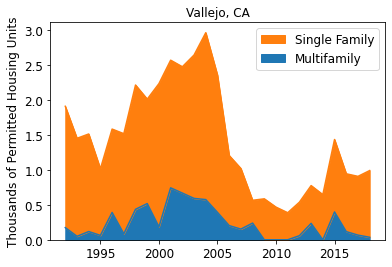

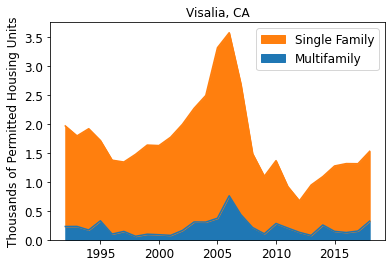

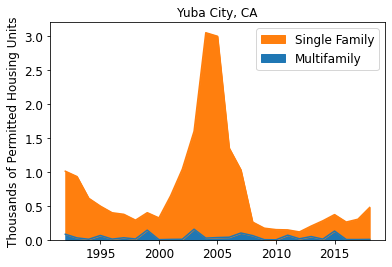

In [25]:
for code in ca_sub:
    if code not in df1.index.levels[0]:
        continue
    plot_util.generic_plot(df1.loc[code], kind='area', title=cbsa_dict[code], ylabel='Thousands of Permitted Housing Units', output_directory=charts_dir)